In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Baca Data

In [3]:
df_customer = pd.read_csv(r'C:\Users\naura\Downloads\Case Study Data Scientist-Final Task\Case Study Data Scientist\Case Study - Customer.csv', delimiter=';')
df_product = pd.read_csv(r'C:\Users\naura\Downloads\Case Study Data Scientist-Final Task\Case Study Data Scientist\Case Study - Product.csv', delimiter=';')
df_store = pd.read_csv(r'C:\Users\naura\Downloads\Case Study Data Scientist-Final Task\Case Study Data Scientist\Case Study - Store.csv', delimiter=';')
df_transaction = pd.read_csv(r'C:\Users\naura\Downloads\Case Study Data Scientist-Final Task\Case Study Data Scientist\Case Study - Transaction.csv', delimiter=';')


In [4]:
df_customer.shape, df_product.shape, df_store.shape, df_store.shape, df_transaction.shape

((447, 5), (10, 3), (14, 6), (14, 6), (5020, 8))

In [5]:
#Data Cleansing

In [6]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [7]:
df_customer.duplicated().sum()

0

In [8]:
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [9]:
df_customer[df_customer['Marital Status'].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


In [10]:
df_customer.dropna(axis=0, inplace=True)

In [11]:
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [12]:
df_product.head()

,ProductID,ProductName,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [13]:
df_product.duplicated().sum()

0

In [14]:
df_product.isnull().sum()

ProductID      0
ProductName    0
Price          0
dtype: int64

In [15]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [16]:
df_store.duplicated().sum()

0

In [17]:
df_store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [18]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [19]:
df_transaction.duplicated().sum()

0

In [20]:
df_transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [21]:
df_customer.dtypes

CustomerID         int64
Age                int64
Gender             int64
Marital Status    object
Income            object
dtype: object

In [22]:
#data cleansing df_customer income menjadi float
df_customer['Income'] = df_customer['Income'].replace('[,]', '.', regex=True).astype(float)

In [23]:
df_customer.dtypes

CustomerID          int64
Age                 int64
Gender              int64
Marital Status     object
Income            float64
dtype: object

In [24]:
df_store.dtypes

StoreID        int64
StoreName     object
GroupStore    object
Type          object
Latitude      object
Longitude     object
dtype: object

In [25]:
#data cleansing df_store latitude longitude menjadi float
df_store['Latitude'] = df_store['Latitude'].replace('[,]', '.', regex=True).astype(float)
df_store['Longitude'] = df_store['Longitude'].replace('[,]', '.', regex=True).astype(float)

In [26]:
df_store.dtypes

StoreID         int64
StoreName      object
GroupStore     object
Type           object
Latitude      float64
Longitude     float64
dtype: object

In [27]:
df_transaction.dtypes

TransactionID    object
CustomerID        int64
Date             object
ProductID        object
Price             int64
Qty               int64
TotalAmount       int64
StoreID           int64
dtype: object

In [28]:
df_transaction['Date']=pd.to_datetime(df_transaction['Date'])
df_transaction['Date'] = df_transaction['Date'].dt.tz_localize(None)


In [29]:
df_transaction.dtypes

TransactionID            object
CustomerID                int64
Date             datetime64[ns]
ProductID                object
Price                     int64
Qty                       int64
TotalAmount               int64
StoreID                   int64
dtype: object

In [30]:
df_transaction['TransactionID'].value_counts()

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64

In [31]:
df_transaction[df_transaction['TransactionID']=='TR71313']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,2022-05-21,P1,8800,10,88000,8
3336,TR71313,401,2022-08-30,P3,7500,6,45000,11
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [32]:
df_transaction.drop_duplicates(subset='TransactionID', keep='last', inplace=True)

In [33]:
df_transaction[df_transaction['TransactionID']=='TR71313']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [34]:
df_transaction['TransactionID'].value_counts()

TR11369    1
TR50181    1
TR76847    1
TR6532     1
TR64658    1
          ..
TR19017    1
TR16411    1
TR15829    1
TR15275    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64

In [35]:
#GABUNGKAN SEMUA DATA

In [36]:
df_merge = pd.merge(df_transaction,df_customer,on=['CustomerID'])
df_merge = pd.merge(df_merge,df_product.drop(columns=['Price']),on=['ProductID'])
df_merge = pd.merge(df_merge,df_store, on=['StoreID'])

In [37]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [38]:
#MODEL MACHINE LEARNING REGRESI (TIME SERIES)

In [39]:
df_regresi = df_merge.groupby(['Date']).agg({
            'Qty':'sum'
}).reset_index()

In [40]:
df_regresi

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


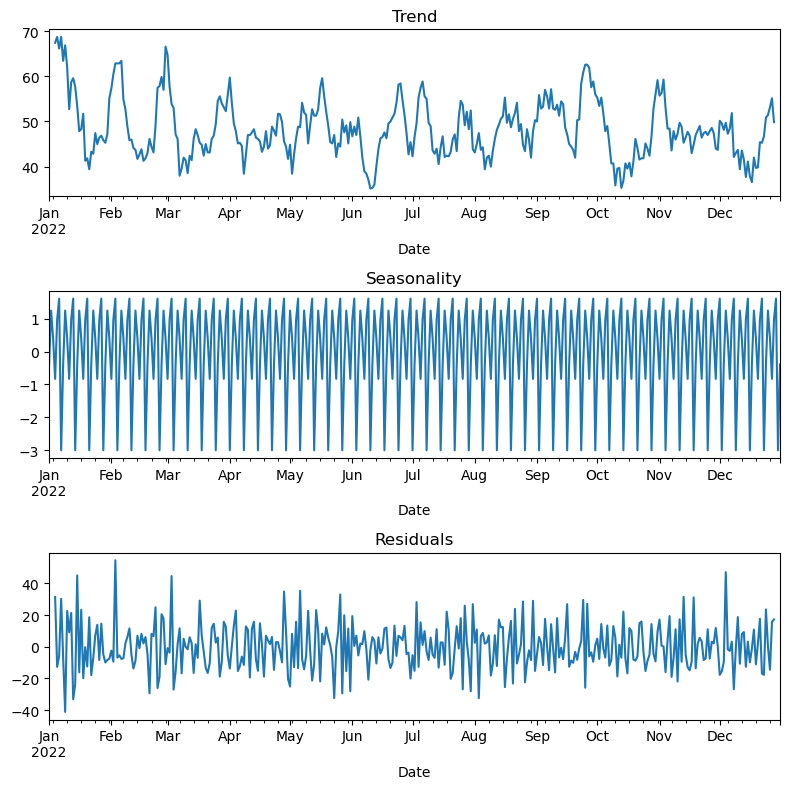

In [41]:
decomposed= seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(8,8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

In [42]:
#UJI STASIONER

In [43]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_regresi['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t %s: %.3f' % (key, value))

ADF Statistic: -19.432791
p-value:0.000000
Critical Values:
	 1%: -3.448
	 5%: -2.870
	 10%: -2.571


In [44]:
cut_off= round(df_regresi.shape[0]*0.8)
df_train = df_regresi[:cut_off]
df_test  = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((292, 2), (73, 2))

In [45]:
df_train

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
287,2022-10-15,33
288,2022-10-16,24
289,2022-10-17,53
290,2022-10-18,47


In [46]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,40


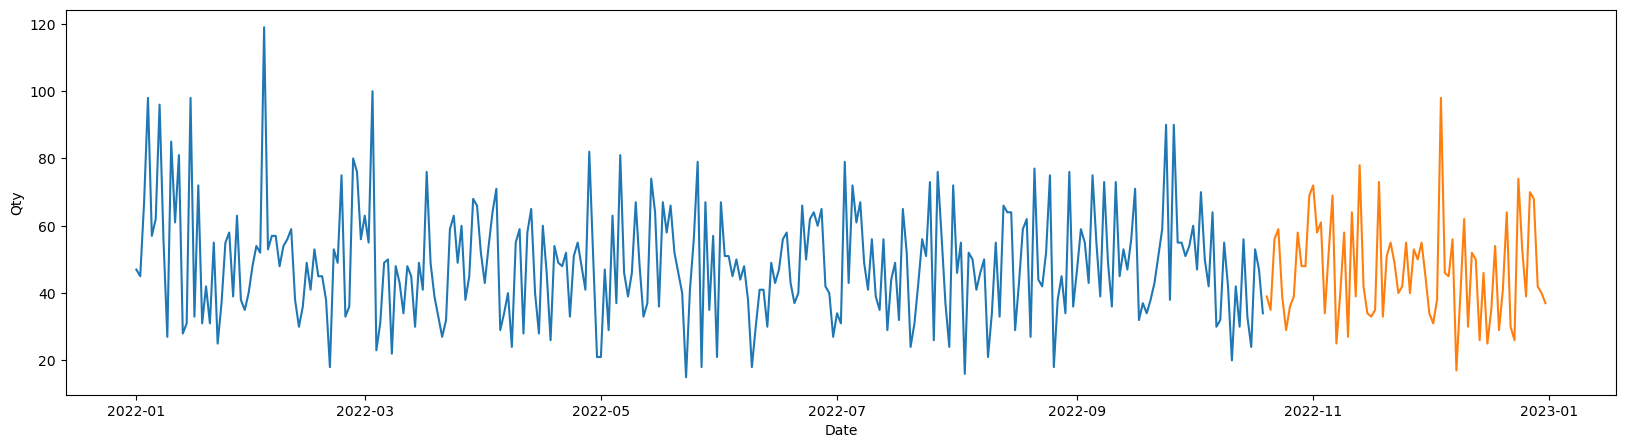

In [47]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y = df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'], y = df_test['Qty']);

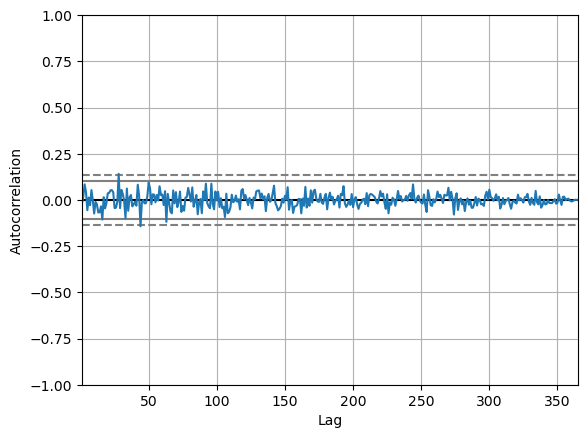

In [48]:
autocorrelation_plot(df_regresi['Qty']);

In [49]:
def rmse(y_actual, y_pred):
    """
    fungsi untuk menghitung RMSE
    """
    
    print(f'RMSE value {mean_squared_error(y_actual, y_pred)**0.5}')
    
def eval(y_actual, y_pred):
    """
    fungsi untuk evaluasi machine learning modelling
    """
    
    rmse(y_actual, y_pred)
    print(f'MAE value {mean_absolute_error(y_actual, y_pred)}')

In [50]:
df_train.head()

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57


In [51]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,40


In [52]:
cols = ['Date']
set(df_train.columns).issuperset(cols)

True

In [53]:
cols = ['Date']
set(df_test.columns).issuperset(cols)

True

RMSE value 17.62207543524842
MAE value 14.029001085610687


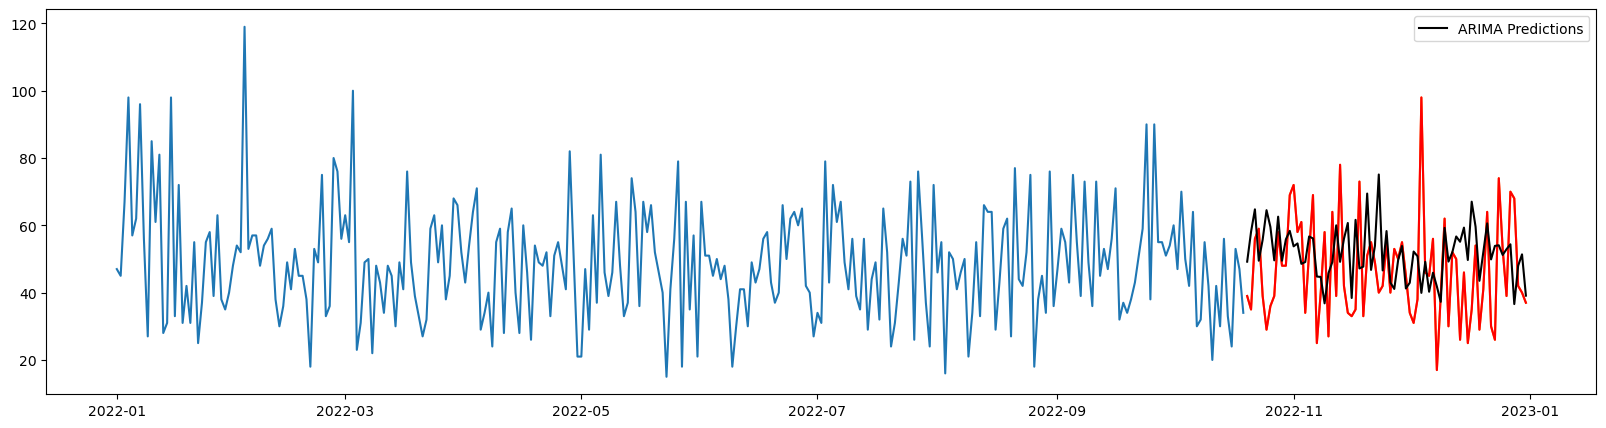

In [54]:
#ARIMA

df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

ARIMAmodel = ARIMA(y, order = (90, 2,1)) 
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))
y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out =y_pred_df['predictions']
eval(df_test['Qty'], y_pred_out)

plt.figure(figsize=(20,5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black',label='ARIMA Predictions')
plt.legend()

In [55]:
#Clustering

In [56]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [57]:
#Identifikasi kolom yang redundant/corelation tinggi
df_merge.corr()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.015837,-0.011380,-0.025403,0.006990,-0.022862,-0.017870,0.003156,0.005915,-0.004738
Price,-0.015837,1.000000,-0.355405,0.439146,-0.032526,0.012628,0.011229,0.001667,-0.027900,0.017325
Qty,-0.011380,-0.355405,1.000000,0.621039,0.011340,-0.025567,-0.011661,-0.029621,-0.008228,0.005167
TotalAmount,-0.025403,0.439146,0.621039,1.000000,-0.013560,-0.015795,-0.009794,-0.025999,-0.032737,0.025294
StoreID,0.006990,-0.032526,0.011340,-0.013560,1.000000,-0.004425,-0.002467,0.004311,0.470561,-0.094403
Age,-0.022862,0.012628,-0.025567,-0.015795,-0.004425,1.000000,-0.025092,0.485523,0.010222,0.019690
Gender,-0.017870,0.011229,-0.011661,-0.009794,-0.002467,-0.025092,1.000000,-0.063359,-0.009898,0.000358
Income,0.003156,0.001667,-0.029621,-0.025999,0.004311,0.485523,-0.063359,1.000000,0.018858,0.003488
Latitude,0.005915,-0.027900,-0.008228,-0.032737,0.470561,0.010222,-0.009898,0.018858,1.000000,-0.393919
Longitude,-0.004738,0.017325,0.005167,0.025294,-0.094403,0.019690,0.000358,0.003488,-0.393919,1.000000


In [58]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty':'sum',
    'Age':'first'
}).reset_index().rename(columns={
    'TransactionID':'count_transaction',
    'Qty':'total_qty'
})

In [59]:
df_cluster.head()

,CustomerID,count_transaction,total_qty,Age
0,1,17,60,55
1,2,12,56,60
2,3,15,56,32
3,4,10,46,31
4,5,7,27,58


In [60]:
data_cluster = df_cluster.drop(columns=['CustomerID'])

data_cluster_normalize = preprocessing.normalize(data_cluster)

In [61]:
data_cluster_normalize

array([[0.20444864, 0.72158345, 0.66145149],
       [0.14467285, 0.67513995, 0.72336423],
       [0.22651995, 0.84567449, 0.48324256],
       ...,
       [0.20716308, 0.75553595, 0.62148925],
       [0.15351993, 0.58616699, 0.79551234],
       [0.18031357, 0.55596683, 0.81141105]])

In [111]:
K = range(2,10)
fits = []
score = []
for k in K:
     model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_cluster_normalize)
     fits.append(model)
        
     score.append(silhouette_score(data_cluster_normalize, model.labels_,metric='euclidean'))

In [112]:
df_cluster['cluster_label']=fits[1].labels_

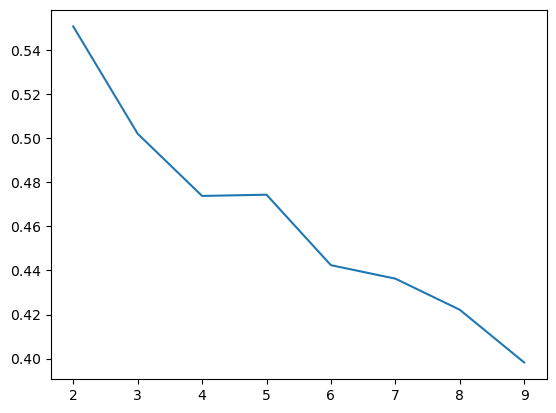

In [113]:
#Memilih  kluster
sns.lineplot(x=K, y = score);

In [114]:
fits[4]

KMeans(n_clusters=6, n_init='auto', random_state=0)

In [115]:
df_cluster['cluster_label']=fits[4].labels_

In [116]:
df_cluster

,CustomerID,count_transaction,total_qty,Age,cluster_label
0,1,17,60,55,2
1,2,12,56,60,5
2,3,15,56,32,4
3,4,10,46,31,4
4,5,7,27,58,3
...,...,...,...,...,...
439,442,13,37,42,5
440,444,18,62,53,2
441,445,17,62,51,2
442,446,11,42,57,1


In [117]:
df_cluster.groupby(['cluster_label']).agg({
    'CustomerID':'count',
    'count_transaction':'mean',
    'total_qty':'mean',
    'Age':'mean'
})

,CustomerID,count_transaction,total_qty,Age
cluster_label,,,,
0,31,14.516129,54.709677,20.741935
1,103,9.766990,34.543689,48.242718
2,80,11.875000,44.325000,35.937500
3,62,7.500000,24.790323,50.516129
4,76,12.355263,48.473684,29.460526
5,92,11.456522,39.858696,41.641304


In [ ]:
'''
Kelompok 1 (cluster_label 0)-> kelompok usia paling muda, paling banyak jumah transaksi dan jumlah qty, jumlah customer paling sedikit
Kelompok 2 (cluster_label 1)-> kelompok usia tertua ke-2, jumlah transaksi dan jumlah qty paling sedikit urutan ke-2, jumlah customer paling banyak
Kelompok 3 (cluster_label 2)-> kelompok usia termuda ke-3, jumlah transaksi dan jumlah qty paling banyak urutan ke-3, jumlah customer paling banyak ke-3
Kelompok 4 (cluster_label 3)-> kelompok usia paling tua, jumlah transaksi dan jumlah qty paling sedikit, jumlah customer paling sedikit ke-2
Kelompok 5 (cluster_label 4)-> kelompok usia termuda ke-2, jumlah transaksi dan jumlah qty paling banyak urutan ke-2, jumlah customer paling sedikit ke-3
Kelompok 6 (cluster_label 5)-> kelompok usia tertua ke-3, jumlah transaksi dan jumlah qty paling sedikit ke-3, jumlah customer paling banyak ke-2

jadi urutan kelompok yang paling banyak jumlah transaksi dan jumlah qty:
kelompok 1 (usia paling muda, customer paling sedikit)-->kemungkinan sekali beli langsung borong/customer sedikit, belinya banyak
kelompok 5 (usia paling muda ke-2, jumlah customer paling sedikit ke-3)-->kemungkinan sekali beli langsung borong, tapi tidak sebanyak kelompok 1
kelompok 3 (usia paling muda ke-3, jumlah customer paling banyak ke-3)-->jumlah customer banyak, belinya banyak
kelompok 6 (usia paling tua ke-3, jumlah customer paling banyak ke-2)-->jumlah customer banyak, belinya sedikit
kelompok 2 (usia paling tua ke-2, jumlah customer paling banyak)--> jumlah customer banyak, belinya sedikit
kelompok 4 (usia paling tua,jumlah customer paling sedikit ke-2)-->jumlah customer sedikit, belinya sedikit

semakin muda range usianya, semakin banyak jumlah transaksi dan qtynya

rekomendasi untuk menarik minat kelompok:
Kelompok 1: promo diskon, membuat produk yang kekinian/berkaitan dengan hal2 yang viral
Kelompok 5: promo diskon, membuat produk yang kekinian/berkaitan dengan hal2 yang viral
Kelompok 3: promo buy one get one atau beli produk sebanyak n-buah dapat promo tertentu, agar mereka semakin sering berbelanja
Kelompok 6: promo buy one get one atau beli produk sebanyak n-buah dapat promo tertentu, agar mereka semakin sering berbelanja
Kelompok 2: promo buy one get one atau beli produk sebanyak n-buah dapat promo tertentu, agar mereka semakin sering berbelanja
Kelompok 4: Usia paling tua, jadi bisa menyediakan pelayanan delivery product dengan alur yang mudah dimengerti orang tua, sehingga mereka tidakperlu susah-susah keluar rumah
'''